In [1]:
%cd /home1/giorgian/projects/trigger-detection-pipeline/sPHENIX/trigger-detection/BGN-ST

/home1/giorgian/projects/trigger-detection-pipeline/sPHENIX/trigger-detection/BGN-ST


/home1/giorgian/anaconda3/envs/jupyter/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import torch
import pickle
import dataloaders
import matplotlib.pyplot as plt
from utils.log import load_checkpoint
from collections import defaultdict
from itertools import islice
from tqdm.notebook import tqdm
from models.Bipartite_Attention_Masked import Bipartite_Attention as Model
import matplotlib as mpl
import torch.nn as nn
import numpy as np
import random

In [3]:
from importlib import reload

In [4]:
config_file_path = 'train_results/biatt-augment-adj/experiment_2024-11-11_07:20:02/config.pkl'
#config_file_path = '/disks/disk1/giorgian/old-trainings/biatt-augment-adj/experiment_2023-08-03_21:42:12/config.pkl'
with open(config_file_path, 'rb') as f:
    config = pickle.load(f)

In [18]:
dconfig = config['data']
dconfig['n_train'] = 1
dconfig['n_valid'] = 317104 - 2
dconfig['n_test'] = 1
dconfig['trigger_input_dir'] =  '/ssd2/giorgian/real-tracks-data-mixed-3/trigger/1/'
dconfig['nontrigger_input_dir'] =  None
dconfig['batch_size'] = 1

train_data, val_data, test_data = dataloaders.get_data_loaders(**dconfig)


In [9]:
DEVICE = 'cuda:0'
# α=0.7
checkpoint_file = 'train_results/biatt-augment-adj/experiment_2024-11-11_07:20:02/checkpoints/model_checkpoint_016.pth.tar'
#checkpoint_file = '/disks/disk1/giorgian/old-trainings/biatt-augment-adj/experiment_2023-08-03_21:42:12/checkpoints/model_checkpoint_016.pth.tar'
mconfig = config['model']
model = Model(**mconfig)
model = load_checkpoint(checkpoint_file, model)
model = model.to(DEVICE)
model.eval()

Bipartite_Attention(
  (_layers): ModuleList(
    (0): Bipartite_Layers(
      (enc): ModuleList(
        (0): Masked_SAB(
          (mab): Masked_MAB(
            (fc_q): Linear(in_features=37, out_features=64, bias=True)
            (fc_k): Linear(in_features=37, out_features=64, bias=True)
            (fc_v): Linear(in_features=37, out_features=64, bias=True)
            (fc_o): Linear(in_features=64, out_features=64, bias=True)
            (ln0): Masked_LayerNorm(
              (ln): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
            )
            (ln1): Masked_LayerNorm(
              (ln): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
            )
          )
        )
        (1): Masked_SAB(
          (mab): Masked_MAB(
            (fc_q): Linear(in_features=64, out_features=64, bias=True)
            (fc_k): Linear(in_features=64, out_features=64, bias=True)
            (fc_v): Linear(in_features=64, out_features=64, bias=True)
            (fc_o): Linear(

In [8]:
!ls train_results/biatt-augment-adj/experiment_2024-11-11_07:20:02/checkpoints

model_checkpoint_001.pth.tar  model_checkpoint_009.pth.tar
model_checkpoint_002.pth.tar  model_checkpoint_010.pth.tar
model_checkpoint_003.pth.tar  model_checkpoint_011.pth.tar
model_checkpoint_004.pth.tar  model_checkpoint_012.pth.tar
model_checkpoint_005.pth.tar  model_checkpoint_013.pth.tar
model_checkpoint_006.pth.tar  model_checkpoint_014.pth.tar
model_checkpoint_007.pth.tar  model_checkpoint_015.pth.tar
model_checkpoint_008.pth.tar  model_checkpoint_016.pth.tar


In [19]:
preds = []
track_vectors = []
TOTAL = int(10e3)
model.eval()
for batch, mask in tqdm(islice(val_data, 0, TOTAL), total=TOTAL)
    tracks = batch.track_vector.to(DEVICE)
    if tracks.shape[1] == 0:
        continue
        
    mask = mask.to(DEVICE)
    preds.extend(model(tracks, mask)[:, -1].detach().cpu().numpy())
    track_vectors.extend(batch.track_vector.cpu().numpy())

SyntaxError: expected ':' (3581547292.py, line 5)

In [4]:
with open('/disks/disk1/giorgian/preds_3.pkl', 'rb') as f:
    res = pickle.load(f)

In [5]:
res.keys()

dict_keys(['preds', 'track_vectors'])

In [16]:
preds = np.concatenate(res['preds'])
tracks = res['track_vectors']

NameError: name 'res' is not defined

(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   2.,   2.,
          5.,   1.,   4.,   2.,  29.,  65.,  72.,  69.,  72.,  78.,  85.,
         80.,  83.,  75.,  96.,  86.,  88., 132., 131., 150., 138., 171.,
        188., 163., 144., 129., 129., 129., 112., 102., 103.,  89.,  89.,
         85., 103., 102.,  73.,  63.,  35.]),
 array([-4.23559809, -3.91710067, -3.59860325, -3.28010559, -2.96160817,
        -2.64311075, -2.32461309, -2.00611567, -1.68761826, -1.36912084,
        -1.05062342, -0.73212576, -0.41362834, -0.09513092,  0.22336674,
         0.54186392,  0.86036158,  1.17885923,  1.49735641,  1.81585407,
         2.13435125,  2.45284891,  2.77134657,  3.08984375,  3.40834141,
         3.72683907,  4.04533625,  4.3638339 ,  4.68233156,  5.00082922,
         5.31932592,  5.63782358,  5.95632124,  6.2748189 ,  6.59331656,
         6.91181326,  7.23031092,  7.54880857,  7.86730623,  8.18580437,
         8.50430107,  8.82279778,  9.14129639,  9.45979309,  9.7782917 ,
 

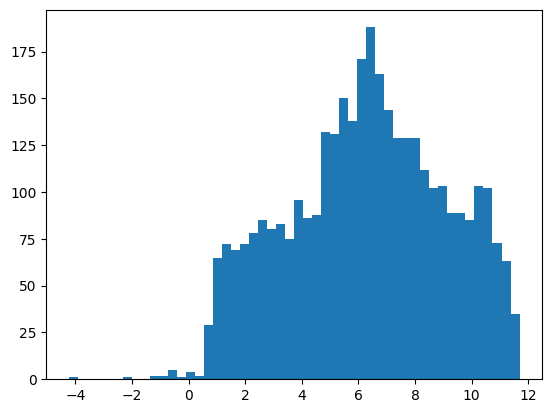

In [17]:
preds = np.array(preds)
plt.hist(np.array(preds), bins=50)

In [12]:
best = np.argsort(preds)[-10:]

In [13]:
bis = best // 16
biis = best % 16

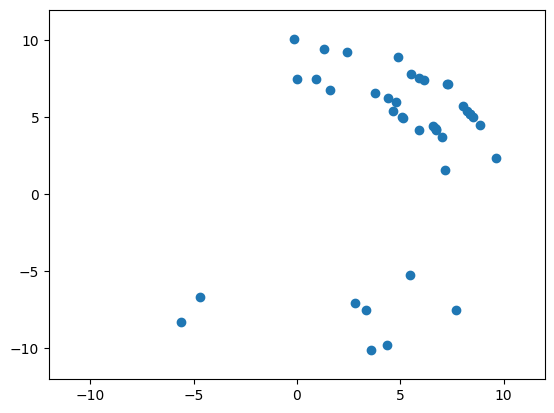

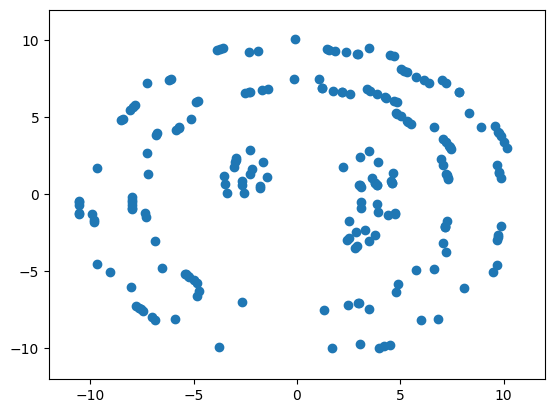

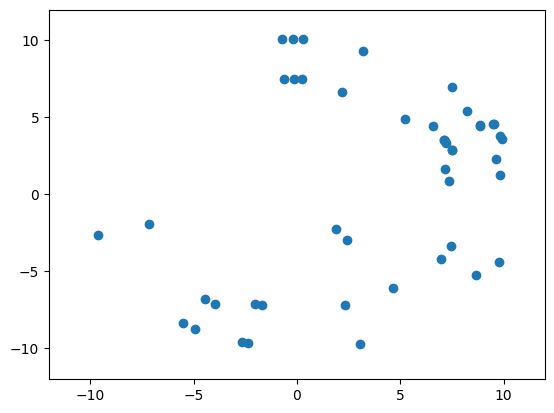

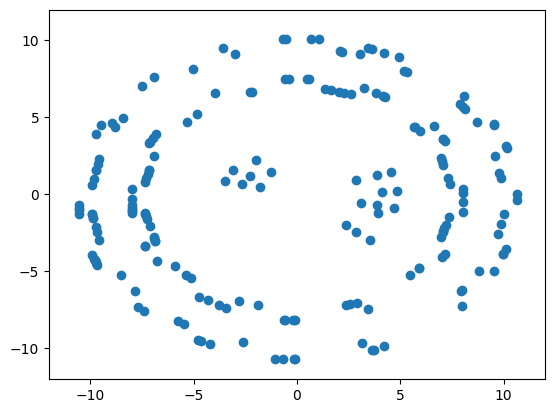

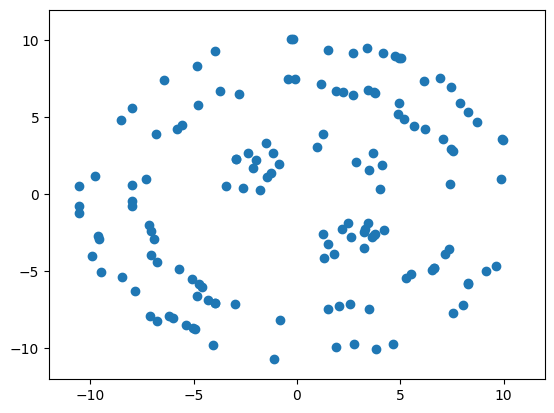

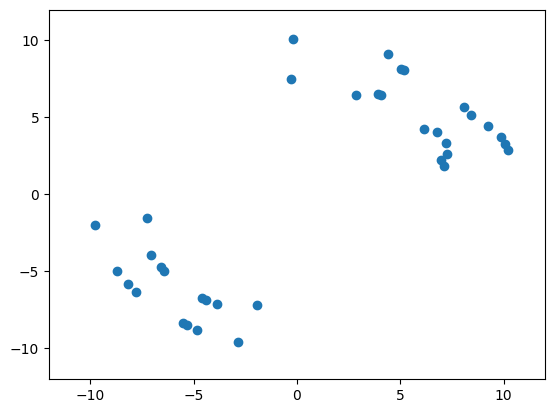

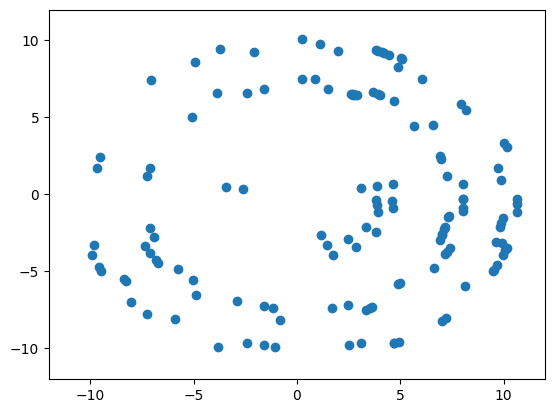

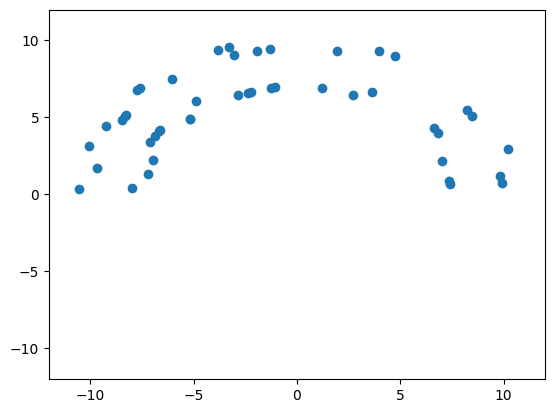

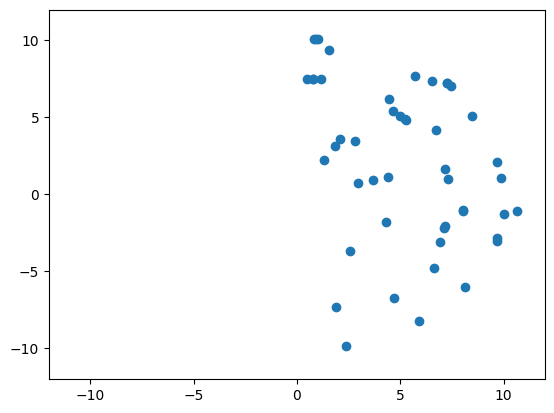

<Figure size 640x480 with 0 Axes>

In [16]:
for bi, bii in zip(bis, biis):
    t = tracks[bi][bii]
    hits = t[..., :15].reshape(-1, 3)
    good = np.any(hits != 0, axis=-1)
    plt.scatter(hits[:, 0][good], hits[:, 1][good])
    plt.xlim(-12, 12)
    plt.ylim(-12, 12)
    plt.figure()

In [29]:
hits

array([[ 3.087628  ,  0.49430746, -9.04189   ],
       [ 3.8471563 ,  0.6291663 , -8.212909  ],
       [ 0.        ,  0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ]], dtype=float32)